**Задание 1**

Размер датасета: (1599, 12)

Анализ пропусков:
                      Пропусков  % от выборки
fixed acidity                 5          0.31
pH                            3          0.19
free sulfur dioxide           3          0.19
chlorides                     3          0.19
residual sugar                1          0.06
citric acid                   1          0.06
volatile acidity              1          0.06
total sulfur dioxide          1          0.06
sulphates                     1          0.06
density                       0          0.00
alcohol                       0          0.00
quality                       0          0.00


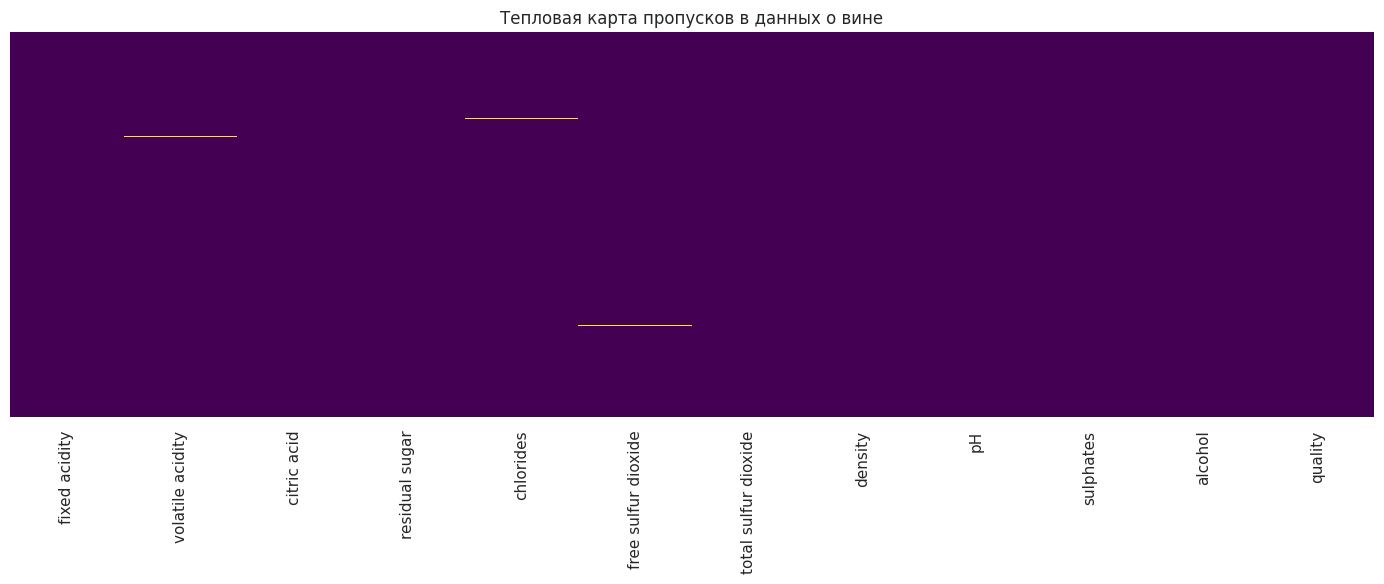


Статистика распределения признаков:
                      Среднее  Медиана  Стд. откл.  Асимметрия   Эксцесс
fixed acidity           8.319    7.900       1.750       0.942     1.169
volatile acidity        0.528    0.520       0.179       0.671     1.225
citric acid             0.271    0.260       0.195       0.317    -0.790
residual sugar          2.546    2.200       1.424       4.471    27.623
chlorides               0.095    0.079       0.324      38.708  1529.219
free sulfur dioxide    15.848   14.000      10.436       1.254     2.056
total sulfur dioxide   46.524   38.000      32.923       1.511     3.785
density                 0.997    0.997       0.002       0.071     0.934
pH                      3.311    3.310       0.154       0.195     0.804
sulphates               0.658    0.620       0.170       2.432    11.736
alcohol                10.425   10.200       1.071       0.877     0.266
quality                 5.636    6.000       0.808       0.218     0.297


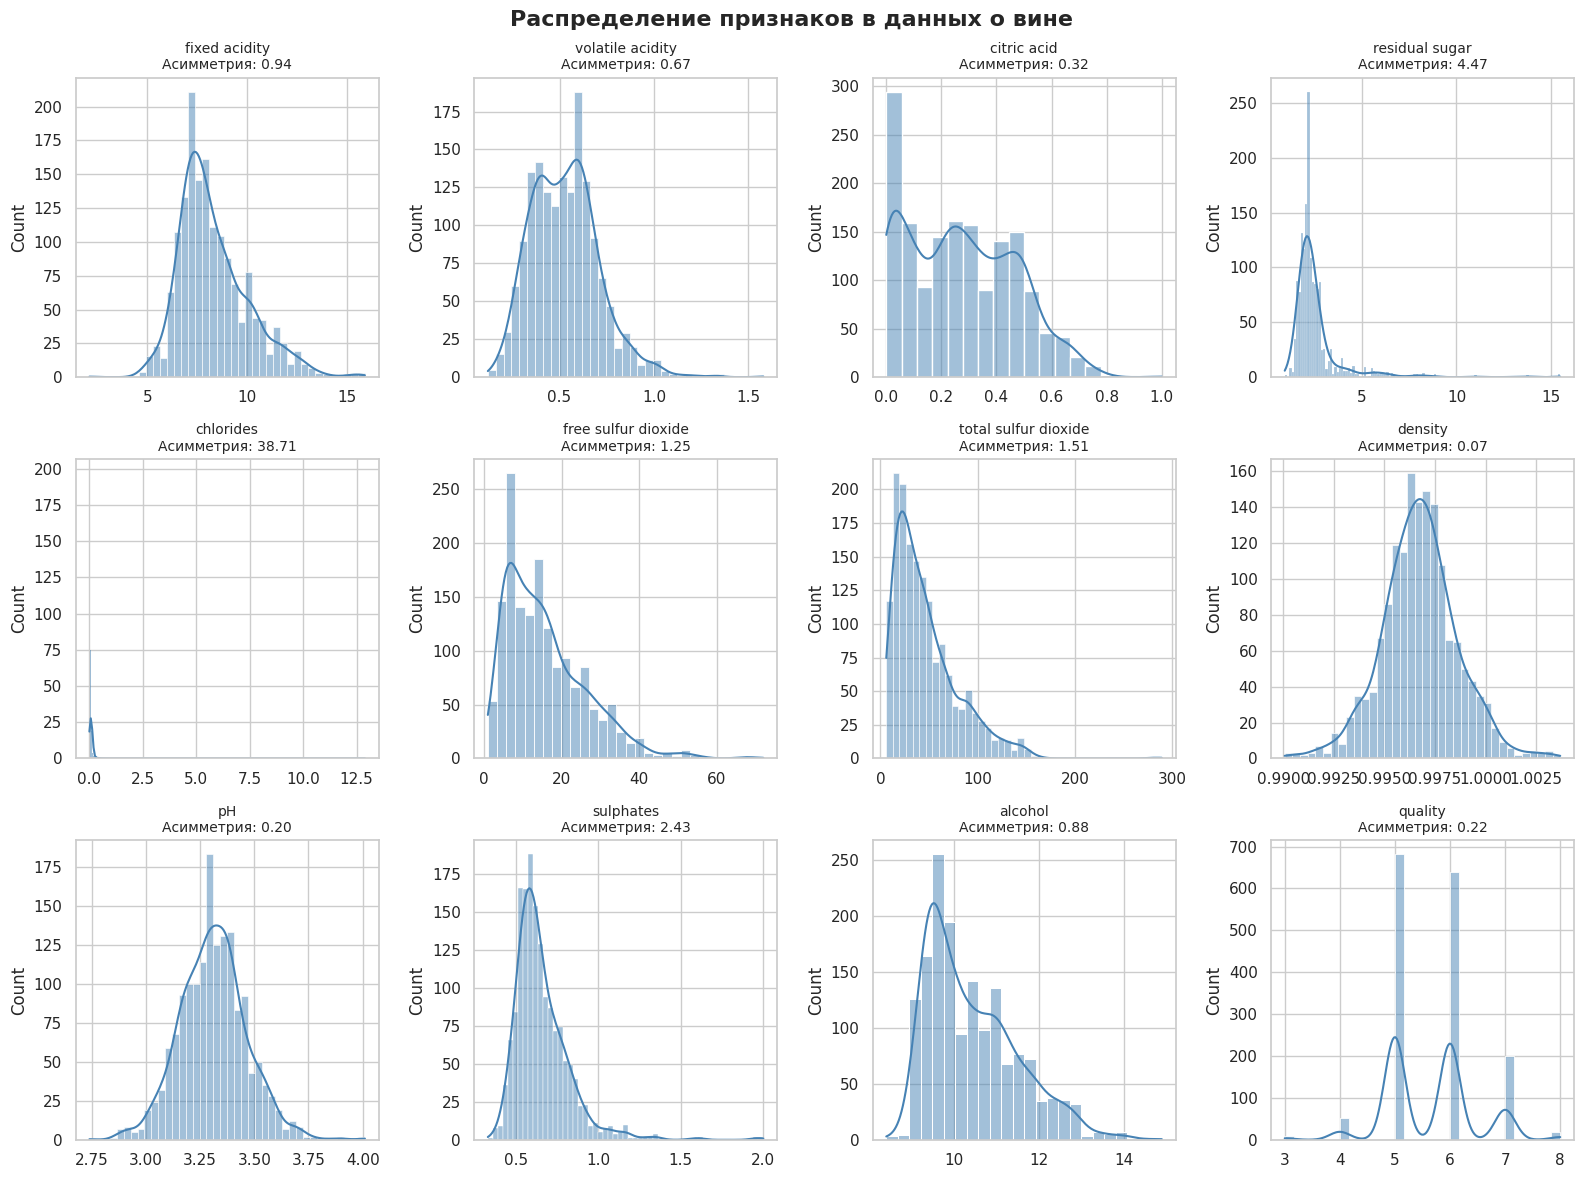


Рекомендации по заполнению пропусков:
             Признак Асимметрия                  Рекомендуемый метод
       fixed acidity       0.94       Медиана (устойчива к выбросам)
    volatile acidity       0.67       Медиана (устойчива к выбросам)
         citric acid       0.32 Среднее (симметричное распределение)
      residual sugar       4.47       Медиана (устойчива к выбросам)
           chlorides      38.71       Медиана (устойчива к выбросам)
 free sulfur dioxide       1.25       Медиана (устойчива к выбросам)
total sulfur dioxide       1.51       Медиана (устойчива к выбросам)
             density       0.07 Среднее (симметричное распределение)
                  pH       0.20 Среднее (симметричное распределение)
           sulphates       2.43       Медиана (устойчива к выбросам)
             alcohol       0.88       Медиана (устойчива к выбросам)
             quality       0.22 Среднее (симметричное распределение)

Пропуски обработаны. Размер датасета: (1599, 12)


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля
sns.set(style="whitegrid", palette="husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Анализ пропусков в данных о вине
# Загрузка с обработкой специальных значений
wine_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Машинное обучение/winequality-red.csv', sep=';', skipinitialspace=True)

# Замена значений
for col in wine_df.columns:
    wine_df[col] = pd.to_numeric(wine_df[col], errors='coerce')

print(f"Размер датасета: {wine_df.shape}")

# Анализ пропусков
missing_data = wine_df.isnull().sum()
missing_percent = (missing_data / len(wine_df)) * 100

print("\nАнализ пропусков:")
missing_df = pd.DataFrame({
    'Пропусков': missing_data,
    '% от выборки': missing_percent.round(2)
}).sort_values('Пропусков', ascending=False)
print(missing_df)

# Визуализация пропусков
if missing_data.sum() > 0:
    plt.figure(figsize=(14, 6))
    sns.heatmap(wine_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Тепловая карта пропусков в данных о вине')
    plt.tight_layout()
    plt.savefig('missing_values_wine.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("\nПропусков в данных НЕ обнаружено!")

# Статистика распределения признаков
print("\nСтатистика распределения признаков:")
stats_df = pd.DataFrame({
    'Среднее': wine_df.mean(),
    'Медиана': wine_df.median(),
    'Стд. откл.': wine_df.std(),
    'Асимметрия': wine_df.skew(),
    'Эксцесс': wine_df.kurtosis()
}).round(3)
print(stats_df)

# Визуализация распределения
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(wine_df.columns):
    sns.histplot(wine_df[col].dropna(), kde=True, ax=axes[idx], color='steelblue')
    axes[idx].set_title(f'{col}\nАсимметрия: {wine_df[col].skew():.2f}', fontsize=10)
    axes[idx].set_xlabel('')

plt.suptitle('Распределение признаков в данных о вине', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('distribution_wine.png', dpi=150, bbox_inches='tight')
plt.show()

# Рекомендации по заполнению пропусков
print("\nРекомендации по заполнению пропусков:")
recommendations = []
for col in wine_df.columns:
    skew = wine_df[col].skew()
    if abs(skew) > 0.5:
        method = "Медиана (устойчива к выбросам)"
    else:
        method = "Среднее (симметричное распределение)"
    recommendations.append([col, f"{skew:.2f}", method])

rec_df = pd.DataFrame(recommendations, columns=['Признак', 'Асимметрия', 'Рекомендуемый метод'])
print(rec_df.to_string(index=False))

# Заполнение пропусков
wine_clean = wine_df.copy()
for col in wine_clean.columns:
    if wine_clean[col].isnull().sum() > 0:
        skew = wine_clean[col].skew()
        if abs(skew) > 0.5:
            wine_clean[col].fillna(wine_clean[col].median(), inplace=True)
        else:
            wine_clean[col].fillna(wine_clean[col].mean(), inplace=True)

print(f"\nПропуски обработаны. Размер датасета: {wine_clean.shape}")

**Задание 2**


Статистика выбросов по признакам:
             Признак  Выбросов     % Нижняя граница Верхняя граница
      residual sugar       157 9.82%           0.85            3.65
           chlorides       112 7.00%           0.04            0.12
           sulphates        59 3.69%           0.28            1.00
total sulfur dioxide        55 3.44%         -38.00          122.00
       fixed acidity        50 3.13%           3.95           12.35
             density        45 2.81%           0.99            1.00
                  pH        35 2.19%           2.92            3.68
 free sulfur dioxide        29 1.81%         -14.00           42.00
             quality        28 1.75%           3.50            7.50
    volatile acidity        19 1.19%           0.02            1.02
             alcohol        14 0.88%           7.10           13.50
         citric acid         1 0.06%          -0.40            0.91

Всего уникальных строк с выбросами: 423 (26.45%)


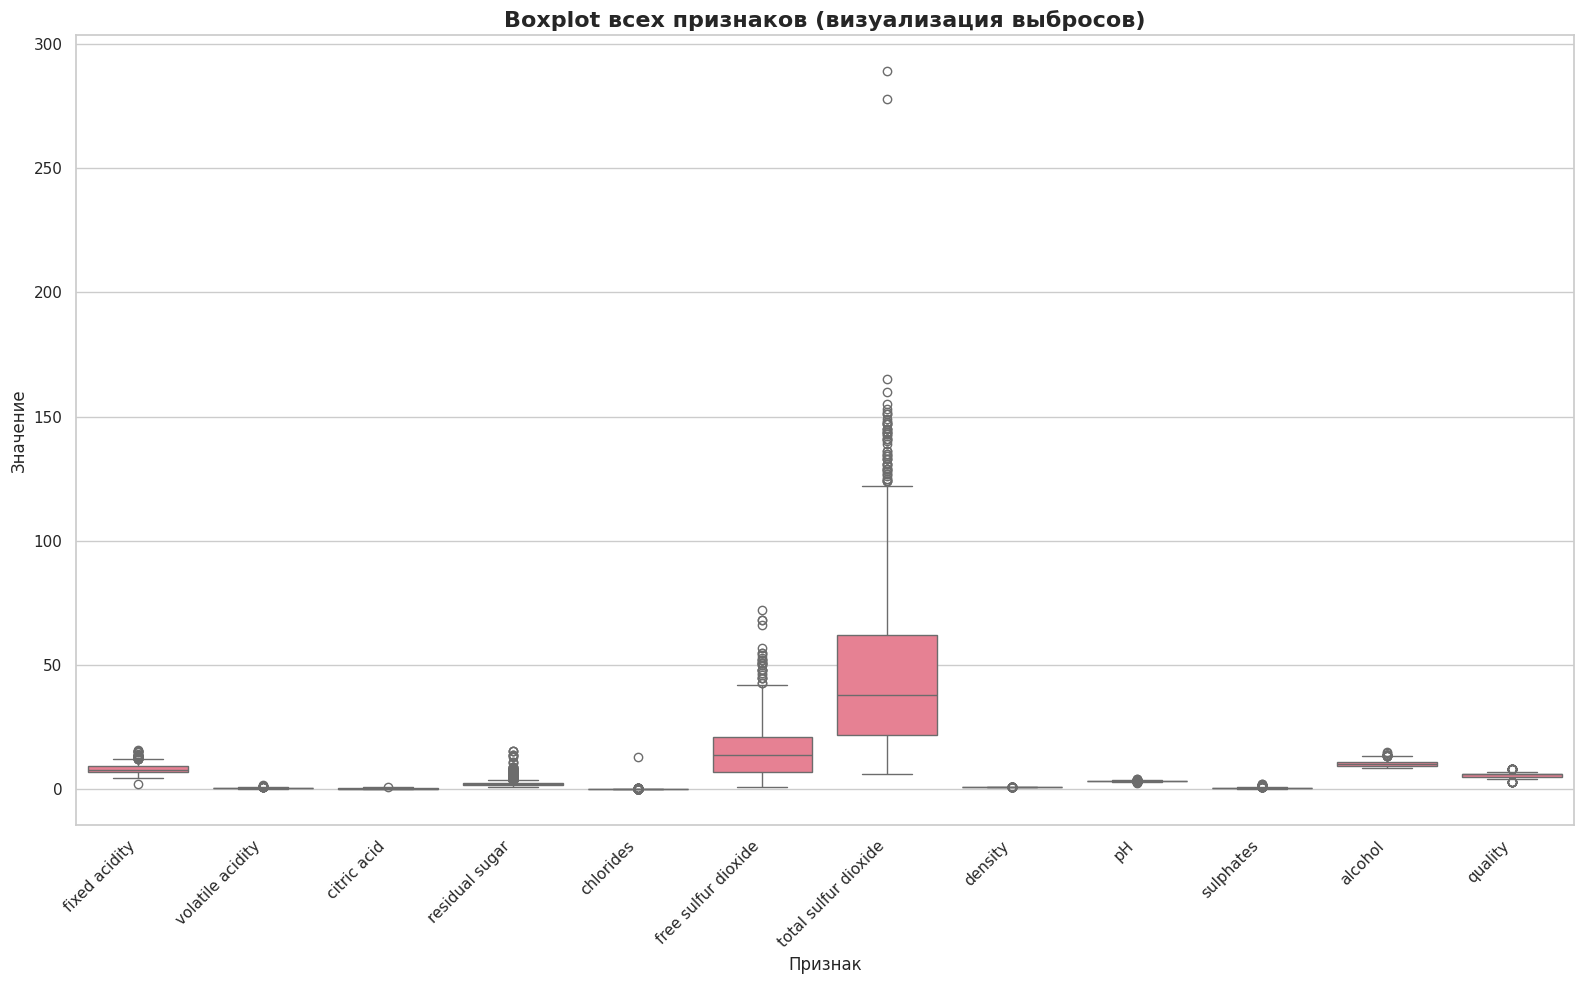


Размер датасета ДО удаления выбросов: 1599 записей
Размер датасета ПОСЛЕ удаления выбросов: 1176 записей
Удалено: 423 записей (26.45%)

Сравнение средних значений до и после удаления выбросов:
                      До удаления  После удаления  Изменение (%)
fixed acidity            8.318883        8.157886          -1.94
volatile acidity         0.527919        0.523157          -0.90
citric acid              0.271064        0.246545          -9.05
residual sugar           2.545901        2.184426         -14.20
chlorides                0.095434        0.078522         -17.72
free sulfur dioxide     15.848371       14.986360          -5.44
total sulfur dioxide    46.523780       42.350638          -8.97
density                  0.996747        0.996576          -0.02
pH                       3.311009        3.324574           0.41
sulphates                0.658041        0.631387          -4.05
alcohol                 10.425485       10.354663          -0.68
quality                  5

In [29]:
# Анализ и удаление выбросов
# Копия датафрейма для обработки
wine_clean = wine_df.copy()

# Расчет выбросов по методу IQR для каждого признака
outliers_summary = []
outliers_indices = set()

for col in wine_clean.columns:
    Q1 = wine_clean[col].quantile(0.25)
    Q3 = wine_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Выявление выбросов
    outliers = wine_clean[(wine_clean[col] < lower_bound) | (wine_clean[col] > upper_bound)]
    n_outliers = len(outliers)
    percent = (n_outliers / len(wine_clean)) * 100

    outliers_summary.append([col, n_outliers, f"{percent:.2f}%", f"{lower_bound:.2f}", f"{upper_bound:.2f}"])

    # Сохранение индексов выбросов для удаления
    outliers_indices.update(outliers.index.tolist())

outliers_df = pd.DataFrame(outliers_summary, columns=['Признак', 'Выбросов', '%', 'Нижняя граница', 'Верхняя граница'])
outliers_df = outliers_df.sort_values('%', ascending=False)
print("\nСтатистика выбросов по признакам:")
print(outliers_df.to_string(index=False))

print(f"\nВсего уникальных строк с выбросами: {len(outliers_indices)} ({len(outliers_indices)/len(wine_clean)*100:.2f}%)")

# Визуализация выбросов через Boxplot для всех признаков
plt.figure(figsize=(16, 10))
wine_melted = pd.melt(wine_clean, var_name='Признак', value_name='Значение')
sns.boxplot(x='Признак', y='Значение', data=wine_melted)
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot всех признаков (визуализация выбросов)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('boxplot_outliers.png', dpi=150, bbox_inches='tight')
plt.show()

# Удаление выбросов
wine_no_outliers = wine_clean.drop(index=list(outliers_indices)).reset_index(drop=True)

print(f"\nРазмер датасета до удаления выбросов: {len(wine_clean)} записей")
print(f"Размер датасета после удаления выбросов: {len(wine_no_outliers)} записей")
print(f"Удалено: {len(wine_clean) - len(wine_no_outliers)} записей ({(1 - len(wine_no_outliers)/len(wine_clean))*100:.2f}%)")

# Сравнение статистик до и после удаления выбросов
comparison = pd.DataFrame({
    'До удаления': wine_clean.mean(),
    'После удаления': wine_no_outliers.mean(),
    'Изменение (%)': ((wine_no_outliers.mean() - wine_clean.mean()) / wine_clean.mean() * 100).round(2)
})
print("\nСравнение средних значений до и после удаления выбросов:")
print(comparison)

**Задание 3**

Размер датасета: (19237, 18)

Структура данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  objec

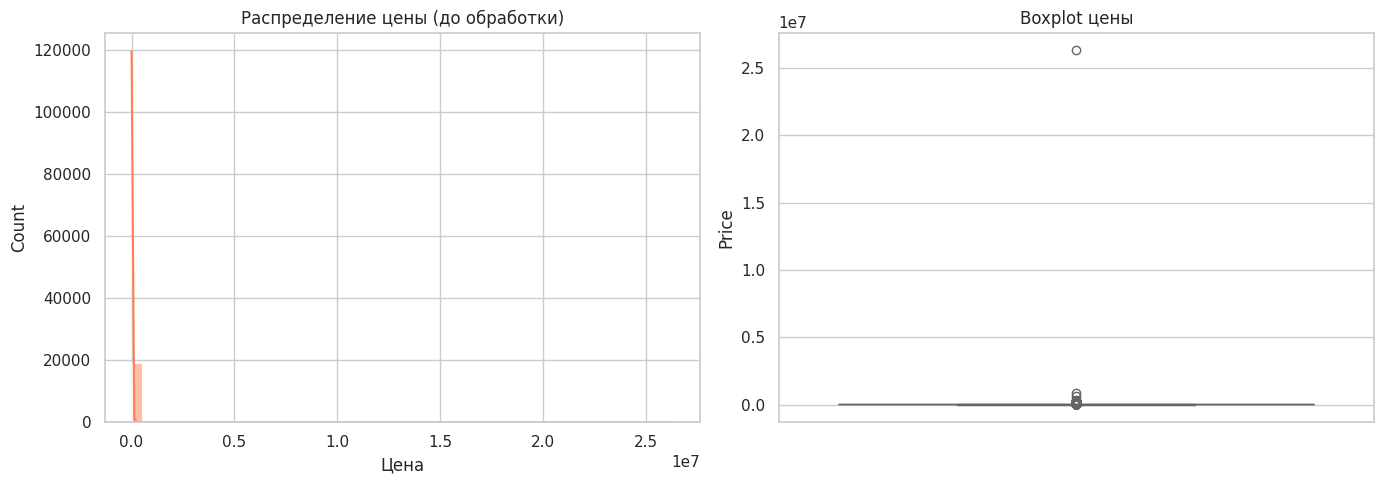


Анализ выбросов для цены:
Q1 = 5,331, Q3 = 22,075, IQR = 16,744
Границы выбросов: [-19,785, 47,191]
Найдено выбросов: 1073 (5.58%)

Удалены экстремальные выбросы (цена > 72,307)
Размер датасета после удаления: 18932 записей (было 19237)


In [30]:
# Обработка данных об автомобилях
# Загрузка данных
car_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Машинное обучение/car_price_prediction.csv')

print(f"Размер датасета: {car_df.shape}")
print(f"\nСтруктура данных:")
print(car_df.info())

# Анализ пропусков
print("\nАнализ пропусков и специальных значений:")
missing_analysis = []
for col in car_df.columns:
    n_missing = car_df[col].isnull().sum()
    n_dash = (car_df[col] == '-').sum() if car_df[col].dtype == 'object' else 0
    total_issues = n_missing + n_dash
    percent = (total_issues / len(car_df)) * 100
    missing_analysis.append([col, n_missing, n_dash, total_issues, f"{percent:.2f}%"])

missing_df = pd.DataFrame(missing_analysis, columns=['Признак', 'NaN', '"-"', 'Всего проблем', '%'])
print(missing_df.to_string(index=False))

# Обработка специфических признаков
car_clean = car_df.copy()

# Обработка Levy - замена "-" на медиану
car_clean['Levy'] = car_clean['Levy'].replace('-', np.nan)
car_clean['Levy'] = pd.to_numeric(car_clean['Levy'], errors='coerce')
levy_median = car_clean['Levy'].median()
car_clean['Levy'] = car_clean['Levy'].fillna(levy_median)
print(f"\nLevy: заменены значения '-' на медиану ({levy_median:.2f})")

# Обработка Mileage - извлечение числового значения
car_clean['Mileage'] = car_clean['Mileage'].str.replace(' km', '').str.replace(' ', '').astype(int)
print("Mileage: преобразован в числовой формат")

# Обработка Engine volume - извлечение числа и флаг Turbo
car_clean['Turbo'] = car_clean['Engine volume'].str.contains('Turbo', case=False).astype(int)
car_clean['Engine volume'] = car_clean['Engine volume'].str.replace(' Turbo', '').str.replace(' ', '').astype(float)
print("Engine volume: извлечено числовое значение + создан бинарный признак Turbo")

# Анализ выбросов для цены
plt.figure(figsize=(14, 5))

# Распределение цены
plt.subplot(1, 2, 1)
sns.histplot(car_clean['Price'], bins=50, kde=True, color='coral')
plt.title('Распределение цены (до обработки)')
plt.xlabel('Цена')

# Boxplot цены
plt.subplot(1, 2, 2)
sns.boxplot(y=car_clean['Price'], color='coral')
plt.title('Boxplot цены')

plt.tight_layout()
plt.show()

# Расчет выбросов для цены по методу IQR
# Статистический анализ цены
Q1_price = car_clean['Price'].quantile(0.25)
Q3_price = car_clean['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

outliers_price = car_clean[(car_clean['Price'] < lower_bound_price) | (car_clean['Price'] > upper_bound_price)]
n_outliers_price = len(outliers_price)

print(f"\nАнализ выбросов для цены:")
print(f"Q1 = {Q1_price:,.0f}, Q3 = {Q3_price:,.0f}, IQR = {IQR_price:,.0f}")
print(f"Границы выбросов: [{lower_bound_price:,.0f}, {upper_bound_price:,.0f}]")
print(f"Найдено выбросов: {n_outliers_price} ({n_outliers_price/len(car_clean)*100:.2f}%)")

# Удаление экстремальных выбросов
upper_extreme = Q3_price + 3 * IQR_price
car_clean_no_outliers = car_clean[car_clean['Price'] <= upper_extreme].reset_index(drop=True)

print(f"\nУдалены экстремальные выбросы (цена > {upper_extreme:,.0f})")
print(f"Размер датасета после удаления: {len(car_clean_no_outliers)} записей (было {len(car_clean)})")

**Задание 4**

Исходные данные:
  Среднее (x̄) = 143
  Дисперсия (σ²) = 64
  Стандартное отклонение (σ) = 8.0
  Объем выборки (n) = 700
  Стандартная ошибка (SE) = 0.3024

95% доверительный интервал:
  Z-критерий = 1.960
  Погрешность = ±0.593
  ДИ = [142.41, 143.59]

99% доверительный интервал:
  Z-критерий = 2.576
  Погрешность = ±0.779
  ДИ = [142.22, 143.78]


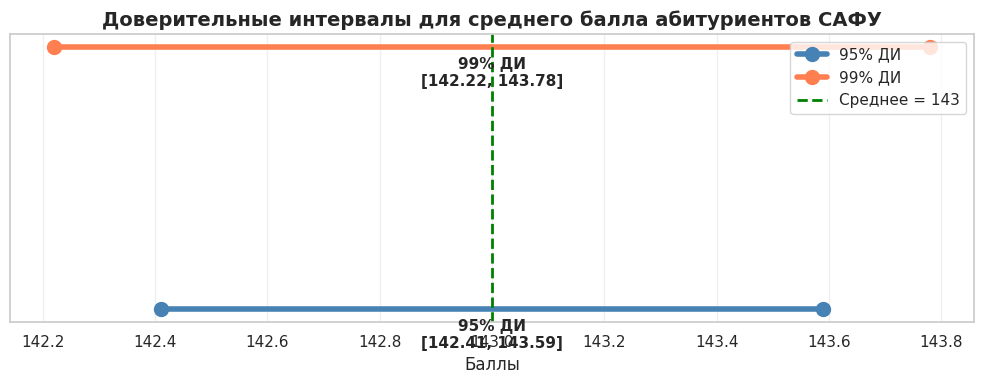


Итоговая таблица доверительных интервалов:
Уровень доверия Z-значение Погрешность Нижняя граница Верхняя граница Ширина ДИ
            95%      1.960       0.593         142.41          143.59      1.19
            99%      2.576       0.779         142.22          143.78      1.56


In [31]:
# Доверительные интервалы
# Исходные данные
mean = 143      # среднее значение
variance = 64   # дисперсия
std_dev = np.sqrt(variance)  # стандартное отклонение
n = 700         # объем выборки

# Стандартная ошибка среднего
se = std_dev / np.sqrt(n)

print(f"Исходные данные:")
print(f"  Среднее (x̄) = {mean}")
print(f"  Дисперсия (σ²) = {variance}")
print(f"  Стандартное отклонение (σ) = {std_dev}")
print(f"  Объем выборки (n) = {n}")
print(f"  Стандартная ошибка (SE) = {se:.4f}")

# Расчет доверительных интервалов
confidence_levels = [0.95, 0.99]
results = []

for conf in confidence_levels:
    z_score = stats.norm.ppf(1 - (1 - conf) / 2)
    margin_error = z_score * se
    lower_bound = mean - margin_error
    upper_bound = mean + margin_error

    results.append({
        'Уровень доверия': f"{int(conf*100)}%",
        'Z-значение': f"{z_score:.3f}",
        'Погрешность': f"{margin_error:.3f}",
        'Нижняя граница': f"{lower_bound:.2f}",
        'Верхняя граница': f"{upper_bound:.2f}",
        'Ширина ДИ': f"{upper_bound - lower_bound:.2f}"
    })

    print(f"\n{int(conf*100)}% доверительный интервал:")
    print(f"  Z-критерий = {z_score:.3f}")
    print(f"  Погрешность = ±{margin_error:.3f}")
    print(f"  ДИ = [{lower_bound:.2f}, {upper_bound:.2f}]")

# Визуализация доверительных интервалов
fig, ax = plt.subplots(figsize=(10, 4))

intervals = [
    (142.41, 143.59, '95% ДИ', 'steelblue'),
    (142.22, 143.78, '99% ДИ', 'coral')
]

for i, (lower, upper, label, color) in enumerate(intervals):
    ax.plot([lower, upper], [i, i], 'o-', color=color, linewidth=4, markersize=10, label=label)
    ax.text((lower + upper)/2, i - 0.15, f'{label}\n[{lower:.2f}, {upper:.2f}]',
            ha='center', fontsize=11, fontweight='bold')

ax.axvline(x=mean, color='green', linestyle='--', linewidth=2, label=f'Среднее = {mean}')
ax.set_yticks([])
ax.set_xlabel('Баллы', fontsize=12)
ax.set_title('Доверительные интервалы для среднего балла абитуриентов САФУ', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('confidence_intervals.png', dpi=150, bbox_inches='tight')
plt.show()

# Итоговая таблица результатов
results_df = pd.DataFrame(results)
print("\nИтоговая таблица доверительных интервалов:")
print(results_df.to_string(index=False))